In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/home/kali/Downloads/titanictrain.csv', usecols = ['Age'])

In [7]:
df

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [8]:
df.isna().sum()

Age    177
dtype: int64

## Types of Missing values
#### 1. Missing Completely At Random (MCAR).
#### 2. Missing At Random (MAR).
#### 3. Missing Not At Random (MNAR).

In [9]:
# MCAR :
# There won't be any relationship between the missing values and observed or unobserved values
# There won't be any pattern of missing values. And probability of missing values will be same
# for all of the records in the dataset.

In [11]:
# pretend Age as an MCAR.
# Handling missing values of type MCAR.
# 1. Mean/Mode Imputation.
# 2. Random Sampling Imptutation.

#### In mean/mode/median imputation we will fill the missing values with the mean or median in regression. 

In [47]:
def mm_imputation(df, feature, method = 'mean') :
    if method == 'mean' :
        value = df[feature].mean()
    else :
        value = df[feature].median()
    df[feature + "_" + method] = df[feature].fillna(value)
    print("[+] Task completed..")

In [126]:
mm_imputation(df, 'Age', 'mean')

[+] Task completed..


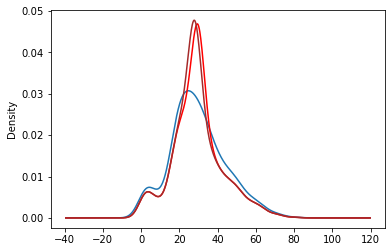

In [60]:
# plot of mean imputation
# plot of distribution of age
fig = plt.figure()
df['Age'].plot(kind = 'kde')
df['Age_mean'].plot(kind = 'kde', color = 'red')
df['Age_median'].plot(kind = 'kde', color = 'brown')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [61]:
# Kurtosis changes for both mean and medain imputation
# to create random sample imputation 
# 1. Count number of missing values.
# 2. Create that much of samples.

In [115]:
def random_sampling_imputation(df, feature) :
    df[feature + "_" + "random_sample"] = df[feature]
    no_of_missing_values = df[feature].isna().sum()
    sample_values = df[feature].dropna().sample(no_of_missing_values, random_state = 0)
    sample_values.index = df[df[feature].isnull()].index
    print(sample_values)
    df.loc[df[feature].isnull(), feature + "_" + "random_sample"] = sample_values
    

In [116]:
random_sampling_imputation(df, 'Age')

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64


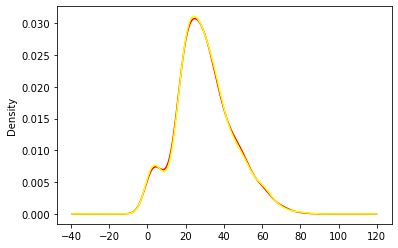

In [130]:
fig = plt.figure()
df['Age'].plot(kind = 'kde', color = 'red')
df.Age_random_sample.plot(kind = 'kde', color = 'yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
# kurtosis of random sampling is same as as feature kurtosis
